# Main Library 

In [1]:
# Reading Data & Visulization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Data Preprocessing & Feature Scailing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Building model
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier

# XGBoost
import xgboost as xgb

# Neural Network 
import tensorflow as tf

In [2]:
# path = "D:\Courses language programming\Machine Learning\Dataset For Machine Learning\Loan_staute\Loan_staute.csv"
# path = "D:\Courses language programming\Machine Learning\Dataset For Machine Learning\Sonar&Mine\Copy of sonar data.csv"
# path = "D:\Courses language programming\5_Machine Learning\Dataset For Machine Learning\Vehicle_DataSet\car data.csv"

# target = 60
# target = "Loan_Status"
# target = Selling_Price

# DEATH_EVENT
# diagnosis

path = input("Please Enter Path The Csv Folder ==> ")

data = pd.read_csv(path)

target = input("Please Enter The Name Of Target Value: ")

data.head(5)

Please Enter Path The Csv Folder ==> D:\Courses language programming\5_Machine Learning\Dataset For Machine Learning\Vehicle_DataSet\car data.csv
Please Enter The Name Of Target Value: Selling_Price


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0



### Check if Data Exist columns I do not need it 
### And Return Me Name OF Columns And Information Fro Data

In [3]:
def Columns_NNeed(data, col_drop):
    columns = ["ID", "name", "Name", "Adress", "Data", "cabin"]
    
    print("Name of columns: \n")

    for i in data.columns:
        print(i)
        for j in columns:
            if j in str(i) and i not in col_drop:
                col_drop.append(i)

    col_drop = list(set(col_drop))

    print()
    print("------------------")
    print()


    print(data.info())
    
    return data

col_drop = []

data = Columns_NNeed(data, col_drop)   

Name of columns: 

Car_Name
Year
Selling_Price
Present_Price
Kms_Driven
Fuel_Type
Seller_Type
Transmission
Owner

------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


### Drop The Columns I Dont Need it  
### And If Null Value The Largest Than Number of half Row
### I will Drop This Columns 

In [4]:
# Drop The Columns
def Drop_columns(data):
    if len(col_drop) > 0:
        for i in col_drop:
            print(i)
            data.drop(columns=i, axis=1, inplace=True)


    for i, j in enumerate(data.isnull().sum()[0:]):
        if j >= data.shape[0]//2:
            print(data.isnull().sum().index[i])
            data.drop(columns=data.isnull().sum().index[i], axis=1, inplace=True)

    return data

data = Drop_columns(data)

Car_Name


## Splitting Data To 1- Numeric 2- Cateagory 
### And Filling Data

In [5]:
# Filling The None Value 
def Filling_data(data):
    for col in data.isnull().sum().index:
        if data[col].dtype == "O":
            data[col].fillna(data[col].value_counts().index[0], inplace=True)
        else:
            data[col].fillna(data[col].mean(), inplace=True)

    return data

data = Filling_data(data)
data.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Analysis For Data

------------- Heat Map For Data ------------ 


C:\Users\osama\AppData\Local\Temp\ipykernel_10592\932019718.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), square=True, cmap="Blues", cbar=True, fmt="0.2f", annot=True);


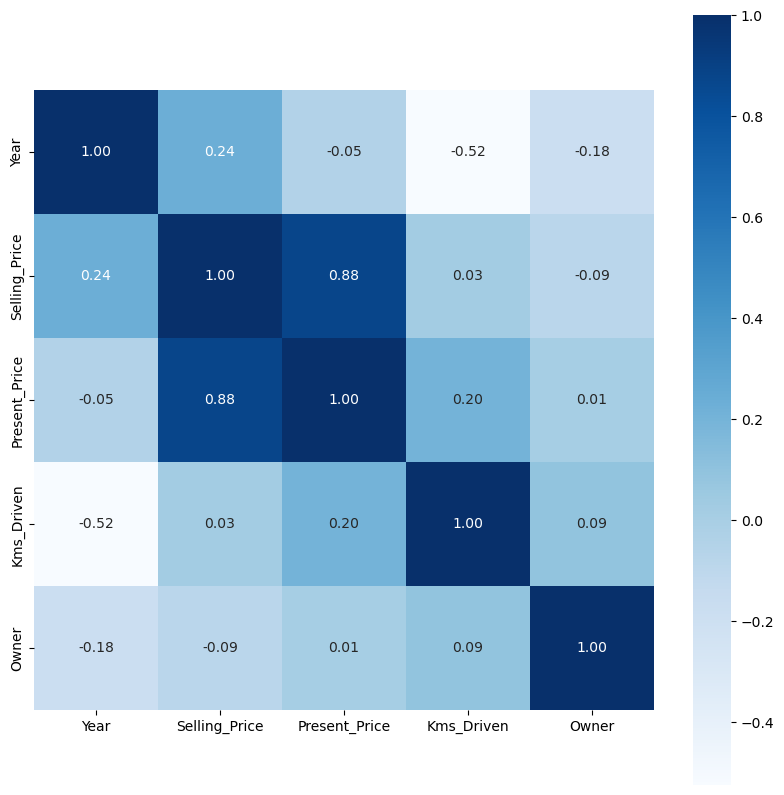

------------- Histogram And Distplot For Data ------------ 



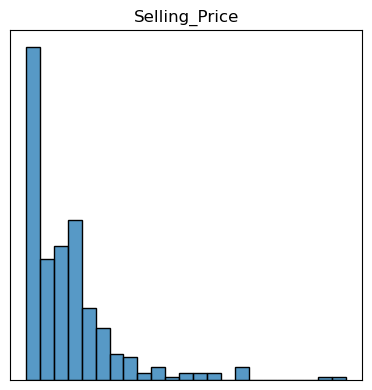

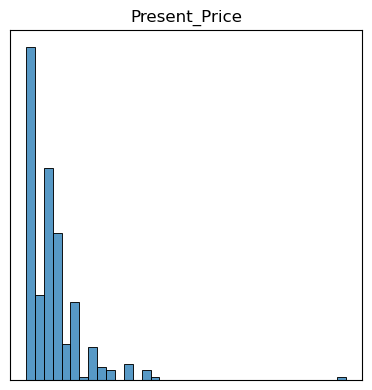

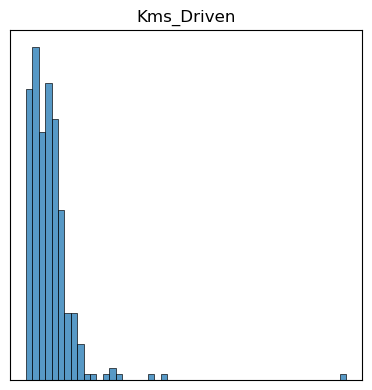

In [6]:
def Analysis(data):
    print("------------- Heat Map For Data ------------ ")
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(data.corr(), square=True, cmap="Blues", cbar=True, fmt="0.2f", annot=True);
    plt.show()
    
    print("------------- Histogram And Distplot For Data ------------ \n")
    
    x = [col for col in data.columns if len(data[col].value_counts()) > 50]
    
    for i, col in enumerate(x):
        plt.figure(figsize=(10, 10))
        plt.subplot(2, 2, i+1)
        plt.xticks([])
        plt.yticks([])
        sns.histplot(data[col]);
        plt.title(col)
    
    return

Analysis(data)    

------------- Histogram And Distplot For Data ------------ 



C:\Users\osama\AppData\Local\Temp\ipykernel_10592\1296651238.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\osama\AppData\Local\Temp\ipykernel_10592\1296651238.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\osama\AppData\Local\Temp\ipykernel_1059

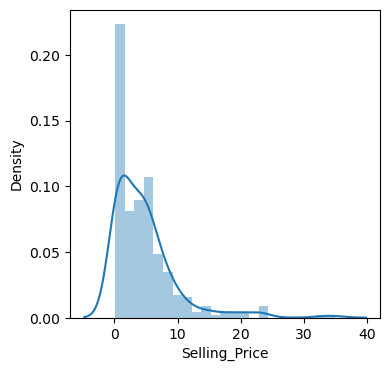

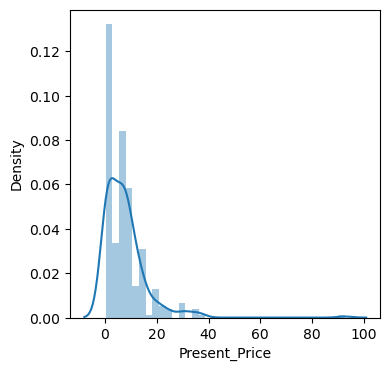

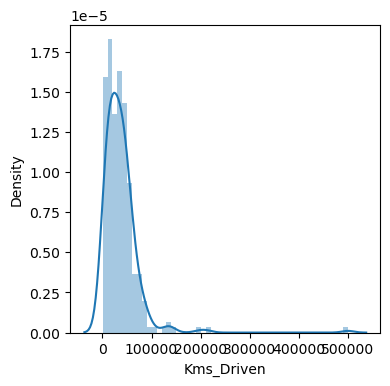

In [7]:
print("------------- Histogram And Distplot For Data ------------ \n")
x = [col for col in data.columns if len(data[col].value_counts()) > 50]
for i, col in enumerate(x):
    plt.figure(figsize=(4, 4))
    sns.distplot(data[col])


------------- Box Plot For Data ------------ 



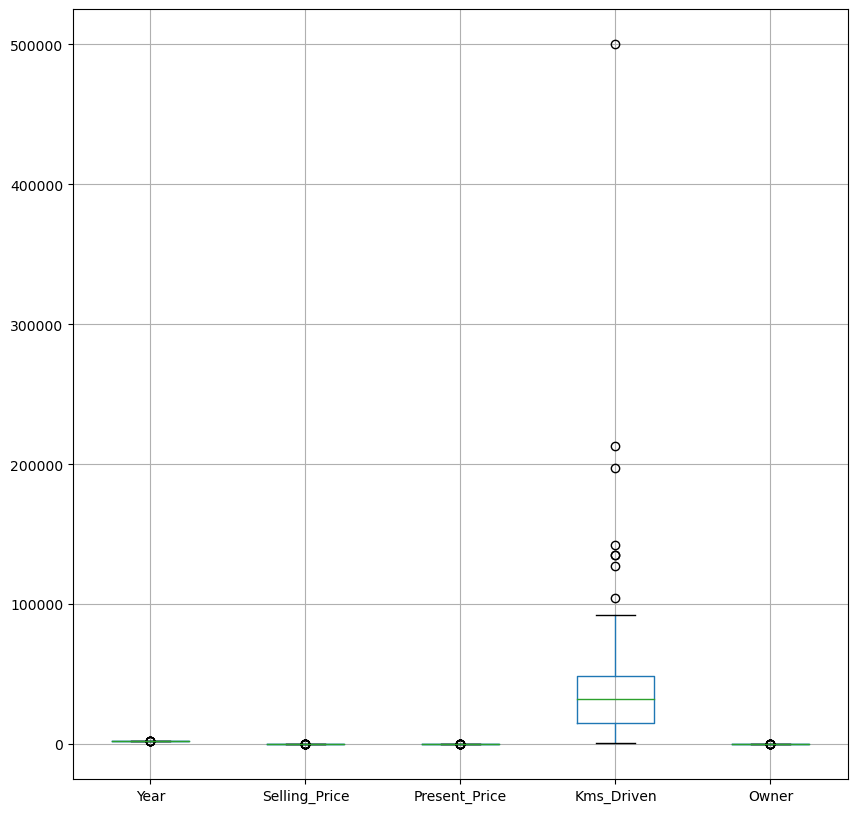

In [8]:
print("------------- Box Plot For Data ------------ \n")

data.boxplot(figsize=(10, 10));

## Make Label Encoder To Categorical Data

In [9]:
# Make Encoder To Data
def Make_Encoder(data):
    object_element = data.select_dtypes(include=["object"])
    
#     print(object_element)

    La = LabelEncoder()

    for col in object_element.columns:
        data[col] = La.fit_transform(data[col])
        

    return data
data = Make_Encoder(data)

### 1- Splitting Data To Input And Output 
## 2- Make Feature Scalling With ==> StandardScaler

In [10]:
X_input = data.drop(columns=target, axis=1)
Y_output = data[target]

def Feature_Scalling(X_input):
    scaler = StandardScaler()
    scaler.fit(X_input)
    X_input = scaler.transform(X_input)
    
    return X_input

X_input = Feature_Scalling(X_input)

x_train, x_test, y_train, y_test = train_test_split(X_input, Y_output, train_size=0.7, random_state=42)

# -------------------------------------   Building Model   -----------------------------------------

### 1 ===> Classifiction  Model ==> Random Forest, AdaBoost , XGBoost

In [11]:
model_Evaluation = []

In [13]:
def Model_Classification_Algorithms(x_train, x_test, y_train, y_test):
    # Model1==> RandomForestClassifier
    model_RF = RandomForestClassifier(n_estimators=10, max_depth=5)
    model_RF.fit(x_train, y_train)


    train_acc_RF = f"The Accuracy Score Of Train Model in -RandomForest- is {model_RF.score(x_train, y_train)} "
    test_acc_RF = f"The Accuracy Score Of Test Model in -RandomForest- is {model_RF.score(x_test, y_test)} "

    model_Evaluation.append([train_acc_RF, test_acc_RF])

    
    # -----------------------------------------------------------------------------------------
    
    # Model2 ==> AdaBoostClassifier
    model_AD = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=50, 
                                                                        min_samples_split=6,
                                                                        min_samples_leaf=5),
                                  n_estimators=100,
                                  learning_rate=0.01)


    model_AD.fit(x_train, y_train)
    
    
    
    train_AD = f"The predict Score Train in -AdaBoostClassifier- is ==> {model_AD.score(x_train, y_train)}"
    test_AD = f"The predict Score Test in -AdaBoostClassifier- is ==> {model_AD.score(x_test, y_test)}"

    model_Evaluation.append([train_AD, test_AD])
    
    # -------------------------------------------------------------------------------------------
    
#     Model3 ==> XGBClassifier
    model_xgb = xgb.XGBClassifier(n_estimators=10, max_depth=5)


    model_xgb.fit(x_train, y_train)


    train_xgbC = f"The predict Score Train in -XGBClassifier- is ==> {model_xgb.score(x_train, y_train)}"
    test_xgbC = f"The predict Score Test in -XGBClassifier- is ==> {model_xgb.score(x_test, y_test)}"

    model_Evaluation.append([train_xgbC, test_xgbC])
    
    
    
    return 

### 2 ====> Regression Model ==> 1- SGD, 2- RandomForest, 3- XGBoost

In [14]:
def Model_Regression_Algorithms(x_train, x_test, y_train, y_test):
    
    # Model1 ==> SGD
    model_SGD = SGDRegressor(penalty="l2", max_iter=1000)
    model_SGD.fit(x_train, y_train)

    train_SGD = f"The predict Score Train in -SGD- is ==> {model_SGD.score(x_train, y_train)}"
    test_SGD = f"The predict Score Test in -SGD- is ==> {model_SGD.score(x_test, y_test)}"

    model_Evaluation.append([train_SGD, test_SGD])
    
    # --------------------------------------------------------------------------------
    
    # Model2 ==> RandomForestRegressor
    model_RFR = RandomForestRegressor(n_estimators=100, max_depth=20)
    model_RFR.fit(x_train, y_train)


    train_acc_RF = f"The Accuracy Score Of Train Model in -RandomForestRegressor- is {model_RFR.score(x_train, y_train)} "
    test_acc_RF = f"The Accuracy Score Of Test Model in -RandomForestRegressor- is {model_RFR.score(x_test, y_test)} "

    model_Evaluation.append([train_acc_RF, test_acc_RF])

    
    # --------------------------------------------------------------------------------
    
    # Model3 ==> XGBRegressor
    model_xgb = xgb.XGBRegressor(n_estimators=100, max_depth=20,
                                 learning_rate=0.2)

    model_xgb.fit(x_train, y_train)
    
    
    train_xgbR = f"The predict Score Train in -XGBRegressor- is ==> {model_xgb.score(x_train, y_train)}"
    test_xgbR = f"The predict Score Test in -XGBRegressor- is ==> {model_xgb.score(x_test, y_test)}"

    model_Evaluation.append([train_xgbR, test_xgbR])
    
    return 

In [15]:
if len(data[target].value_counts()) <= 10:
    print("---------------^ The Model Is Classification ^--------------------- \n")
    
    Model_Classification_Algorithms(x_train, x_test, y_train, y_test, The_Best_model)
    
else:
    print("--------------- ^ The Model Is Regression ^------------------------ \n")
    
    Model_Regression_Algorithms(x_train, x_test, y_train, y_test)
    
for i, j in model_Evaluation:
    print(i)
    print(j)
    print("\n------------------------------ \n")
    

--------------- ^ The Model Is Regression ^------------------------ 

The predict Score Train in -SGD- is ==> 0.8760386342934924
The predict Score Test in -SGD- is ==> 0.8758792735100156

------------------------------ 

The Accuracy Score Of Train Model in -RandomForestRegressor- is 0.9832730749046983 
The Accuracy Score Of Test Model in -RandomForestRegressor- is 0.9658306863920758 

------------------------------ 

The predict Score Train in -XGBRegressor- is ==> 0.999999974026856
The predict Score Test in -XGBRegressor- is ==> 0.961636117922619

------------------------------ 



## Neural Network

In [17]:
if len(data[target].value_counts()) <= 10:
    print("---------------^ The Model Is Neural Network ^--------------------- \n")
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(32, activation=tf.nn.relu),
        tf.keras.layers.Dense(8, activation=tf.nn.relu),
        tf.keras.layers.Dense(len(list(set(y_train))), activation=tf.nn.softmax)
    ])

    model.compile(optimizer="Nadam", 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=["accuracy"])

    model.fit(x_train, y_train, epochs=30)


    print("\n" ,"-"*50, "\n")

    loss, accuracy = model.evaluate(x_test, y_test)

    print("\n" ,"-"*50, "\n")

    testing_acc = f"The predict Score Testing  in -Neural Network- is ==> {accuracy}"
    testing_loss = f"The predict Testing Loss in -Neural Network- is ==> {loss}"


    print(testing_acc)
    print(testing_loss)